ВЫполнение задания для летней школы по DataScience 2017 http://letnyayashkola.org/datascience/ .
Задание содержит данные о покемонах. Дополнительная инфа в 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import scatter_matrix

# data view print options
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

height has been deprecated.



# Загрузка и общее инфо о данных

In [2]:
# откорректировал один столюец, т.к. там какая-то лажа была, сделал интуитивно
data = pd.read_csv("pokemon_evolution_parameter_correct.csv", na_values='""')
#data = data['is_baby'].fillna(-1, axis=0)
print data.shape

# delete JP columns as duplicates
# and other garbage columns
data1 = data.drop('name_jp', axis=1);
data1 = data1.drop('name_jp_romaji', axis=1);
data1 = data1.drop('name_phonetic', axis=1);
data1 = data1.drop('species_jp', axis=1);
data1 = data1.drop('name', axis=1);
data = data1
print data.shape

(663, 38)
(663, 33)


In [3]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print categorical_columns
print numerical_columns

['identifier', 'species']
['id', 'generation_id', 'ndex', 'kdex', 'jdex', 'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id', 'ability1_id', 'ability2_id', 'abilitydream_id', 'evolution_parent_pokemon_id', 'evolution_method_id', 'evolution_parameter', 'height', 'weight', 'gender_rate', 'catch_rate', 'exp_yield', 'base_happiness', 'egg_group1_id', 'egg_group2_id', 'is_baby', 'baby_breed_item_id', 'hatch_counter', 'lvl_100_exp', 'pokemon_order', 'legacy_id']


In [4]:
data[numerical_columns].describe()

,id,generation_id,ndex,kdex,jdex,jdex_old,hdex,sdex,udex,type1_id,type2_id,ability1_id,ability2_id,abilitydream_id,evolution_parent_pokemon_id,evolution_method_id,evolution_parameter,height,weight,gender_rate,catch_rate,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
count,663.000000,663.000000,663.000000,151.000000,256.000000,251.000000,205.000000,218.000000,158.000000,663.000000,306.000000,663.000000,355.000000,571.000000,322.000000,321.000000,299.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,175.000000,663.000000,9.000000,663.000000,6.630000e+02,663.000000,505.000000
mean,529.469080,3.045249,328.033183,76.000000,128.500000,126.000000,102.970732,106.500000,77.879747,8.761689,7.372549,49.956259,71.411268,93.798599,299.170807,3.420561,47.943144,11.490196,577.039216,3.022624,98.920060,141.375566,66.033183,6.452489,7.908571,0.027149,280.111111,27.669683,1.053326e+06,333.441931,253.019802
std,1405.496343,1.480305,186.922901,43.734045,74.045031,72.601653,59.272874,60.730063,45.319581,4.785481,4.828036,35.719149,39.734143,48.034451,188.771843,4.426562,66.857056,10.543944,927.302988,2.126889,76.800668,59.858184,19.112375,4.329735,3.586803,0.162641,27.624466,24.401434,1.686685e+05,193.035763,145.957973
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,3.000000,20.000000,0.000000,1.000000,2.000000,0.000000,231.000000,5.000000,6.000000e+05,1.000000,1.000000
25%,166.500000,2.000000,166.500000,38.500000,64.750000,63.500000,52.000000,53.250000,39.250000,5.000000,3.000000,26.000000,39.000000,50.000000,133.000000,1.000000,22.500000,6.000000,99.000000,1.000000,45.000000,83.000000,70.000000,3.000000,5.000000,0.000000,291.000000,20.000000,1.000000e+06,166.500000,127.000000
50%,332.000000,3.000000,332.000000,76.000000,128.500000,126.000000,103.000000,107.500000,77.500000,10.000000,5.000000,46.000000,75.000000,102.000000,284.000000,1.000000,33.000000,10.000000,288.000000,4.000000,60.000000,145.000000,70.000000,5.000000,7.000000,0.000000,293.000000,20.000000,1.000000e+06,332.000000,253.000000
75%,497.500000,4.000000,487.000000,113.500000,192.250000,188.500000,154.000000,156.750000,116.750000,12.000000,12.000000,66.000000,101.000000,135.000000,450.500000,6.000000,43.000000,14.000000,609.000000,4.000000,175.000000,187.500000,70.000000,10.000000,10.000000,0.000000,295.000000,25.000000,1.059860e+06,500.500000,379.000000
max,10018.000000,5.000000,649.000000,151.000000,256.000000,251.000000,202.000000,210.000000,155.000000,17.000000,17.000000,164.000000,159.000000,161.000000,636.000000,22.000000,616.000000,145.000000,9500.000000,8.000000,255.000000,390.000000,140.000000,15.000000,14.000000,1.000000,297.000000,120.000000,1.640000e+06,667.000000,505.000000


In [5]:
data[categorical_columns].describe()

,identifier,species
count,663,663
unique,649,475
top,rotom,Dragon
freq,6,7


Данные разряжённые. Судя по названиям столбцов некоторые из них являются сопроводительными (вроде legacy id).
Самый часто встречающийся с identifier rotom (встречается 6 раз) и species = Dragon (7 раз).

In [6]:
# Влияющие друг на друга параметры
data1 = data.corr()
data1['baby_breed_item_id']>0.9 

'''
id : kdex, baby_breed_item_id 
generation_id : ndex, legacy_id, pokemon_order, baby_breed_item_id
ndex : kdex, udex, baby_breed_item_id, pokemon_order
baby_breed_item_id vs type2_id
jdex : jdex_old
hdex : baby_breed_item_id
baby_breed_item_id : type2_id, legacy_id
evolution_parent_pokemon_id : udex, pokemon_order
'''

'\nid : kdex, baby_breed_item_id \ngeneration_id : ndex, legacy_id, pokemon_order, baby_breed_item_id\nndex : kdex, udex, baby_breed_item_id, pokemon_order\nbaby_breed_item_id vs type2_id\njdex : jdex_old\nhdex : baby_breed_item_id\nbaby_breed_item_id : type2_id, legacy_id\nevolution_parent_pokemon_id : udex, pokemon_order\n'

Столбцы, на которые стоит обратить первое внимание. Они коррелируют друг с другом.
id,
kdex, hdex, ndex, udex, 
jdex, jdex_old,
baby_breed_item_id,
generation_id,
legacy_id,
pokemon_order,
baby_breed_item_id,
type2_id, evolution_parent_pokemon_id

# Знания из данных

### Поколения

- ndex зависит от generation_id. ВОзможно это нумерация внутри  поколения, но с учётом сдвига количества предыдущих.

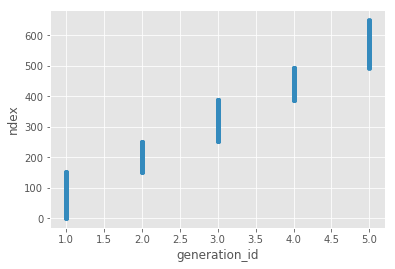

In [7]:
data.plot.scatter(y='ndex', x='generation_id')

- Опыт exp_yield у каждого поколений generation_id 1,2,3 распределён примерно одинаково, за исключением некоторых выбросов.

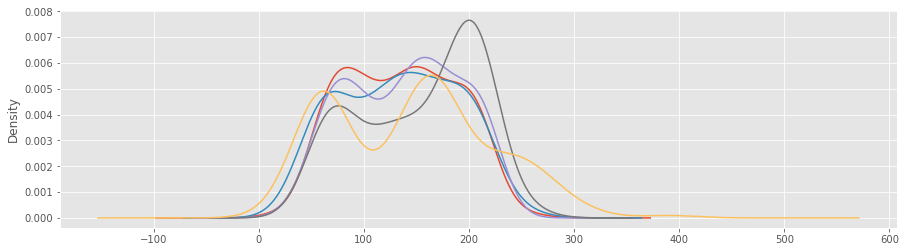

In [8]:
#data.plot.scatter(x='exp_yield', y ='generation_id')

plt.figure(1, figsize=(15,4))
#plt.subplot(1,2,1)


data[data['generation_id']==1]['exp_yield'].plot(kind='density')
data[data['generation_id']==2]['exp_yield'].plot(kind='density')
data[data['generation_id']==3]['exp_yield'].plot(kind='density')

#plt.figure(2)
#plt.subplot(1,2,2)
data[data['generation_id']==4]['exp_yield'].plot(kind='density')
data[data['generation_id']==5]['exp_yield'].plot(kind='density')

- Количество покемонов по поколениям generation_id, включая детей:

                 0      1
generation_id            
1              NaN  151.0
2              8.0   92.0
3              2.0  136.0
4              8.0  108.0
5              NaN  158.0


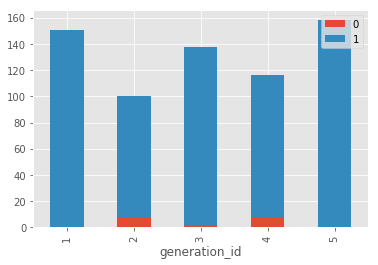

In [9]:
df = data[data['is_baby']==1].groupby('generation_id').size()
df1 = data[data['is_baby']==0].groupby('generation_id').size()
df2 = pd.DataFrame([df, df1]).T
df2.plot(kind='bar', stacked=True)
print df2


- Самые счастливые base_happiness это 1 и 5-е generation_id поколения:

              1         2         3         4         5
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean   0.166667  0.166667  0.166667  0.166667  0.166667
std    0.372829  0.327882  0.291913  0.287040  0.332352
min    0.000000  0.000000  0.000000  0.000000  0.000000
25%    0.006623  0.012500  0.009058  0.049569  0.018987
50%    0.013245  0.020000  0.032609  0.068966  0.022152
75%    0.034768  0.095000  0.148551  0.068966  0.077532
max    0.927152  0.830000  0.746377  0.750000  0.841772


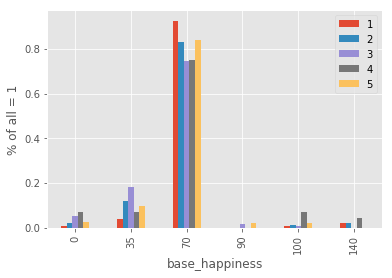

In [10]:
df = pd.DataFrame([data[data['generation_id']==1].groupby('base_happiness').size() / data[data['generation_id']==1].shape[0], 
                   data[data['generation_id']==2].groupby('base_happiness').size() / data[data['generation_id']==2].shape[0],
                   data[data['generation_id']==3].groupby('base_happiness').size() / data[data['generation_id']==3].shape[0],
                   data[data['generation_id']==4].groupby('base_happiness').size() / data[data['generation_id']==4].shape[0],
                   data[data['generation_id']==5].groupby('base_happiness').size() / data[data['generation_id']==5].shape[0]]).T.fillna(0)
df.columns = ['1','2','3','4','5']
dfplt1 = df.plot(kind='bar')
dfplt1.set_ylabel('% of all = 1')
print df.describe()

- Распределение типов покемонов по поколениям

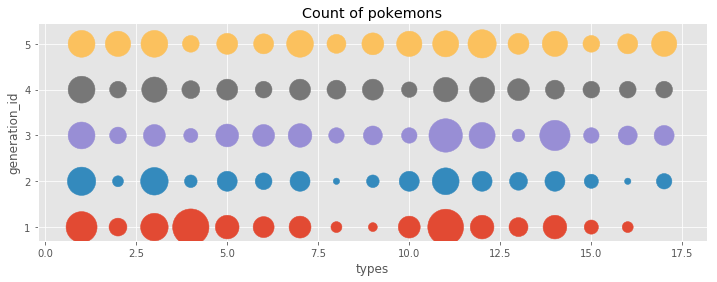

In [11]:
datag1 = data[data['generation_id']==1]
df1 = pd.DataFrame(datag1.groupby('type1_id').size())
df2 = pd.DataFrame(datag1.groupby('type2_id').size())
datag1 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag2 = data[data['generation_id']==2]
df1 = pd.DataFrame(datag2.groupby('type1_id').size())
df2 = pd.DataFrame(datag2.groupby('type2_id').size())
datag2 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag3 = data[data['generation_id']==3]
df1 = pd.DataFrame(datag3.groupby('type1_id').size())
df2 = pd.DataFrame(datag3.groupby('type2_id').size())
datag3 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag4 = data[data['generation_id']==4]
df1 = pd.DataFrame(datag4.groupby('type1_id').size())
df2 = pd.DataFrame(datag4.groupby('type2_id').size())
datag4 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag5 = data[data['generation_id']==5]
df1 = pd.DataFrame(datag5.groupby('type1_id').size())
df2 = pd.DataFrame(datag5.groupby('type2_id').size())
datag5 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

dataGenType = pd.DataFrame( {'gen1' : datag1, 'gen2' : datag2, 'gen3' : datag3, 
                             'gen4' : datag4, 'gen5' : datag5}).fillna(0)#.sum().sort_values()
#dataGenType.plot(kind='bar', stacked=True, figsize=(14,6))

plt.figure(1, figsize=(12,4))
xxx = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
yyy = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

plt.scatter(x=xxx, y=yyy, s=dataGenType['gen1']*40)
yyy = yyy + 1
plt.scatter(x=xxx, y=yyy, s=dataGenType['gen2']*40)
yyy = yyy + 1
plt.scatter(x=xxx, y=yyy, s=dataGenType['gen3']*40)
yyy = yyy + 1
plt.scatter(x=xxx, y=yyy, s=dataGenType['gen4']*40)
yyy = yyy + 1
plt.scatter(x=xxx, y=yyy, s=dataGenType['gen5']*40)

plt.xlabel('types')
plt.ylabel('generation_id')
plt.title('Count of pokemons')

- два самых встречаемых типа (type1_id, type2_id) покемонов: 1-й и 11-й

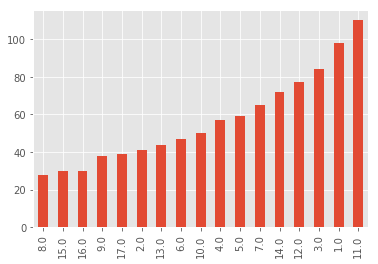

In [12]:
#dataGenType = dataGenType.T
dataGenType.T.sum().sort_values().plot(kind='bar')

- Существуют ли покемоны, которые меняют свой тип при эволюционировании?

Да, существуют. Из всей серии таких всего 35.

In [13]:
i = 0
count = 0
while i < data.shape[0]-1 :

    idParent = data['evolution_parent_pokemon_id'][i]
    if np.isnan(idParent):
        idParent = 0
    if idParent == 0:
        i = i+1
        continue
    isSameType = not ((data['type1_id'][i] == data['type1_id'][idParent]) or (
        data['type1_id'][i] == data['type2_id'][idParent]) or(
        data['type2_id'][i] == data['type1_id'][idParent]) or(
        data['type2_id'][i] == data['type2_id'][idParent]))
    if isSameType: 
        print 'id = ', data['id'][i], 'type1 =', data['type1_id'][i], 'typeParent =', data['type1_id'][idParent]
        count = count + 1
    i = i+1
print count

id =  25 type1 = 13 typeParent = 1
id =  122 type1 = 14 typeParent = 1
id =  124 type1 = 15 typeParent = 13
id =  125 type1 = 13 typeParent = 10
id =  126 type1 = 10 typeParent = 1
id =  135 type1 = 13 typeParent = 11
id =  136 type1 = 10 typeParent = 11
id =  143 type1 = 1 typeParent = 2
id =  183 type1 = 11 typeParent = 6
id =  185 type1 = 6 typeParent = 14
id =  196 type1 = 14 typeParent = 11
id =  197 type1 = 17 typeParent = 11
id =  202 type1 = 14 typeParent = 15
id =  208 type1 = 9 typeParent = 14
id =  212 type1 = 7 typeParent = 15
id =  226 type1 = 11 typeParent = 12
id =  233 type1 = 1 typeParent = 6
id =  242 type1 = 1 typeParent = 12
id =  358 type1 = 14 typeParent = 4
id =  424 type1 = 1 typeParent = 12
id =  429 type1 = 8 typeParent = 14
id =  430 type1 = 17 typeParent = 11
id =  461 type1 = 17 typeParent = 1
id =  462 type1 = 13 typeParent = 1
id =  463 type1 = 1 typeParent = 4
id =  464 type1 = 5 typeParent = 1
id =  465 type1 = 12 typeParent = 1
id =  466 type1 = 13 typ

- дети не имеют параметра kdex, evolution_parent_pokemon_id;

In [14]:
data[data['is_baby']==1]['kdex'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: kdex, dtype: float64

- каждый ребёнок имеет egg_group1_id == 15 и не имеет egg_group2_id. При этом не все взрослые имеют egg_group2_id;

In [15]:
data[data['is_baby']==1]['egg_group1_id']

171    15
172    15
173    15
174    15
235    15
237    15
238    15
239    15
297    15
359    15
405    15
432    15
437    15
438    15
439    15
445    15
446    15
457    15
Name: egg_group1_id, dtype: int64

- Дети обычно рождаются высотой (height) <= 10 и весом < 1150

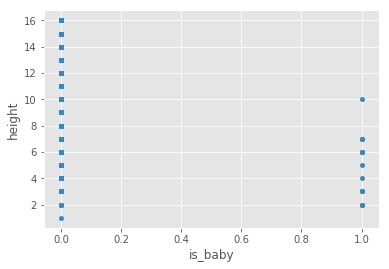

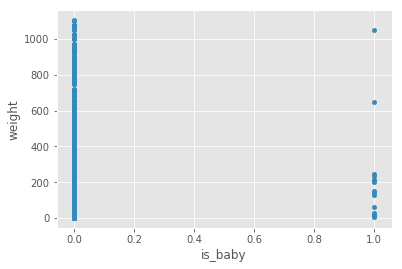

In [16]:
data[data['height']<17].plot.scatter(y='height',  x='is_baby')
data[data['weight']<1150].plot.scatter(y='weight',  x='is_baby')

- В среднем, третье поколение выше всех остальных.

11.9470198675
11.63
12.3985507246
11.3017241379
10.3101265823


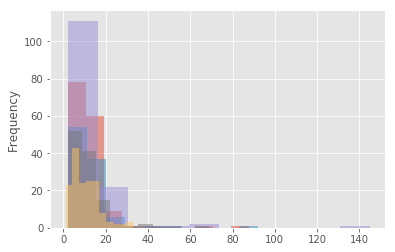

In [17]:
print data[data['generation_id']==1]['height'].mean()
print data[data['generation_id']==2]['height'].mean()
print data[data['generation_id']==3]['height'].mean()
print data[data['generation_id']==4]['height'].mean()
print data[data['generation_id']==5]['height'].mean()

data[data['generation_id']==1]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==2]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==3]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==4]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==5]['height'].plot(kind='hist', alpha=0.5)

- Базовое счастье не зависит от того ребёнок или нет. Но дети в среднем счастливее.

65.7054263566
77.7777777778


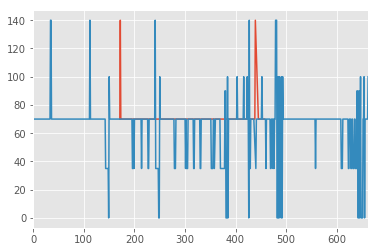

In [18]:
data[data['is_baby']==1]['base_happiness'].plot()
data[data['is_baby']==0]['base_happiness'].plot()
print data[data['is_baby']==0]['base_happiness'].mean()
print data[data['is_baby']==1]['base_happiness'].mean()

# Разное, пробы

In [19]:
# for proccess interupting
error here please


SyntaxError: invalid syntax (<ipython-input-19-5b3b1939de29>, line 2)

In [ ]:
#data[numerical_columns][data['weight']<1250][data['height']<11].plot.scatter(y='weight', x='height', c='is_baby')
#data[data['is_baby']==1]

#data.plot.scatter(y='generation_id', x='is_baby')
#data.plot.scatter(y='lvl_100_exp', x='is_baby')
#data.plot.scatter(y='ndex', x='is_baby')
#data.plot.scatter(y='kdex', x='is_baby')
#data.plot.scatter(y='jdex', x='is_baby')
#data.plot.scatter(y='jdex_old', x='is_baby')
#data.plot.scatter(y='hdex', x='is_baby')
#data.plot.scatter(y='sdex', x='is_baby')

#data.plot.scatter(y='type1_id', x='is_baby')
#data.plot.scatter(y='type2_id', x='is_baby')
#data.plot.scatter(y='ability1_id', x='is_baby')
#data.plot.scatter(y='ability2_id', x='is_baby')
#data.plot.scatter(y='abilitydream_id', x='is_baby')
#data.plot.scatter(y='evolution_parent_pokemon_id', x='is_baby')
#data.plot.scatter(y='height', x='is_baby')
#data.plot.scatter(y='weight', x='is_baby')
#data.plot.scatter(y='gender_rate', x='is_baby')
#data.plot.scatter(y='catch_rate', x='is_baby')
#data.plot.scatter(y='exp_yield', x='is_baby')
#data.plot.scatter(y='base_happiness', x='is_baby')
#data.plot.scatter(y='egg_group1_id', x='is_baby')
#data.plot.scatter(y='egg_group2_id', x='is_baby')
#data.plot.scatter(y='baby_breed_item_id', x='is_baby')
#data.plot.scatter(y='hatch_counter', x='is_baby')
#data.plot.scatter(y='lvl_100_exp', x='is_baby')
#data.plot.scatter(y='pokemon_order', x='is_baby')
#data.plot.scatter(y='legacy_id', x='is_baby')
#data.plot.scatter(y='is_baby', x='is_baby')
#data.plot.scatter(y='is_baby', x='evolution_parameter')

In [ ]:
from scipy.cluster.vq import kmeans
dataK = kmeans(data1, 3)


In [ ]:
data1 = data
data_nonbinary = pd.get_dummies(data[categorical_columns])
print data_nonbinary.columns

data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

kdex vs jdex
udex vs ndex

исследовать
type1_id=3 заметил на  generation_id, dex, udex, ability1_id, abilitydream_id
    

In [ ]:
data.plot.scatter(x='weight', y='base_happiness', marker='x', alpha=0.6, figsize=(15,10))

- Какой хороший стартовый покемон? критерии хорошести: не злой, сильный и т.п. 
- Хороший базовый набор нескольких покемонов? - как выбрать критерии?
- Более высокие покемоны - более счастливые? - не зависит
- Более толстые счастливые? - не зависит
- Кластеризация по типам, способностям